In [1]:
import numpy as np
import re
import plotly
plotly.tools.set_credentials_file(username='sehowerter', api_key='G5Ogb7gUjjxyuw46SW2r')
plotly.tools.set_config_file(world_readable=False,
                             sharing='private')
import plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
import pandas as pd
import glob
import ternary
import datetime as dt
import matplotlib as plt

# Getting all ratios into one dataframe

In [2]:
allratios = pd.DataFrame(columns = ['user','tweet_id','happ_score', 'happ_words', 'likes', 'replies',
       'retweets', 'scrape_date', 'total_words', 'tweet_date','url'])
allratiofiles = glob.glob('ratios/*')
#print('All of the users we have ratios & tweet reply conversations for:')
for file in allratiofiles:
    sname = re.search('(?<=ratios/).*(?=-ratios.csv)',file).group(0)
    #print(sname)
    rdf = pd.read_csv(file)
    rdf = rdf.drop("Unnamed: 0",axis=1)
    rdf = rdf.dropna(axis=0, how='any')
    rdf['user'] = sname
    allratios = pd.concat([allratios,rdf],ignore_index=True)

for tID in list(allratios['tweet_id']):
    subset = allratios.loc[allratios['tweet_id'] == tID]
    if len(subset.index) == 2:
        hapwords = subset['happ_words']
        drop = subset.index[subset['happ_words']== min(hapwords)]
        allratios = allratios.drop(drop, axis=0)
    elif len(subset.index) > 2:
        pass
        print('dulicate tweet! ',list(subset.index))
        
    
for i in allratios.index:
    try:
        allratios.loc[i,'replies'] = float(allratios.loc[i,'replies'])
    except:
        allratios.loc[i,'replies'] = float(allratios.loc[i,'replies'][:-1])*1000
    if allratios.loc[i,'happ_words'] < 200:
        allratios.loc[i,'happ_score'] = np.nan
        
allratios['norm_replies'] = allratios['replies']/(allratios['replies'] + allratios['retweets'] + allratios['likes'])
allratios['norm_likes'] = allratios['likes']/(allratios['replies'] + allratios['retweets'] + allratios['likes'])
allratios['norm_retweets'] = allratios['retweets']/(allratios['replies'] + allratios['retweets'] + allratios['likes'])
'''
allratios['tweet'] = ""
tweetfiles = glob.glob('tweet_convos/*/*')
for i in allratios.index:
    file = [f for f in tweetfiles if str(allratios.loc[i,'tweet_id']) in str(f)]
    #print(file)
    for f in file:
        if 'convo-' in f:
            pass
        else:
            tweetstring = open(f,'r',encoding = 'utf-8')
            allratios.loc[i,'tweet'] = tweetstring.read()
'''        
# Subsetting to plot all tweet ratios
allhapp_ratios = allratios[['retweets','replies','likes','happ_score','user','tweet_id']]#,'tweet']]
allwords_ratios = allratios[['retweets','replies','likes','happ_words','user']]
allhapp_ratios = allhapp_ratios.T.to_dict().values()
allwords_ratios = allwords_ratios.T.to_dict().values()
allratios

happ_score happ_words  likes replies retweets          scrape_date  \
0        5.566133        450   3137     137     1024  2018-04-30_19_40_39   
1        5.772030        596   3372     173     1070  2018-04-30_19_39_09   
2        5.635230        608  12405     439     5107  2018-04-30_19_37_45   
3        5.981941        711   2832     260      489  2018-04-30_19_36_17   
4        5.974891        640   5997     298     1066  2018-04-30_19_34_58   
5        5.805595        992  10274     343     2552  2018-04-30_19_33_28   
6        6.109281        473   3356     169      318  2018-04-30_19_32_06   
7        6.098845        952   4895     241      796  2018-04-30_19_30_41   
8        6.275636        802  10376     477     1632  2018-04-30_19_29_14   
9        6.008761        702   3026     166      597  2018-04-30_19_27_46   
10       6.042460        870   6931     261     1360  2018-04-30_19_53_43   
11       5.898395        754   3291     227      507  2018-04-30_19_52_20   
12       6.272822        847   4071     400      854  2018-04-30_19_50_56   
13       6.075211       1612   3732     221      554  2018-04-30_19_49_28   
14       5.994123        798   6119     362     1633  2018-04-30_19_48_07   
15       6.418674        377   3514     163      365  2018-04-30_19_46_12   
16       6.304771        350   2829     165      450  2018-04-30_19_44_48   
17       6.146180        877  10627     439     2479  2018-04-30_19_43_27   
18       5.579464        504   2394     194      617  2018-04-30_19_42_02   
19       6.246402        428   2515     172      297  2018-04-30_20_06_27   
20       6.109347        903   4411     237      558  2018-04-30_20_04_58   
21       6.032393        890   6584     357     1552  2018-04-30_20_03_40   
22       6.274619        433   6505     341      670  2018-04-30_20_02_14   
23       6.135125        722   4913     319      982  2018-04-30_20_00_50   
24       6.344502        462   3909     357      662  2018-04-30_19_59_24   
25       6.218437        934   5915     342     1223  2018-04-30_19_58_00   
26       6.113486        941   5006     258      891  2018-04-30_19_56_34   
27       6.209234        640  13116     303     3241  2018-04-30_19_55_07   
28       6.203530        881   3443     181      650  2018-04-30_20_14_51   
29       6.281481        466   5852     219      812  2018-04-30_20_13_29   
...           ...        ...    ...     ...      ...                  ...   
13734    5.884146        603  30384     567     4241  2018-05-03_10_33_43   
13735         NaN        195    631      53       77  2018-05-03_10_32_25   
13736         NaN        194   4846     130      560  2018-05-03_10_30_57   
13737    5.675406        320    975      75      130  2018-05-03_10_29_34   
13738         NaN         45    890      27       54  2018-05-03_10_40_35   
13739    5.519613        543   4536     667     1344  2018-05-03_10_39_17   
13740    5.627733        922  67222    1800    19777  2018-05-03_10_37_51   
13741    5.867846        260   5432     125      607  2018-05-03_10_36_28   
13742    5.928510        443  10504     181     1253  2018-05-03_10_47_56   
13743    6.073873        519  54289     333     5003  2018-05-03_10_46_28   
13744         NaN        172    966      57      167  2018-05-03_10_45_06   
13745    5.698479        434  10935     442     1755  2018-05-03_10_43_44   
13746    5.913641        401   1183     115      181  2018-05-03_10_42_26   
13747         NaN        126    664      36       52  2018-05-03_10_54_53   
13748         NaN        195   7525      72      818  2018-05-03_10_53_29   
13749         NaN        124   1042      58      132  2018-05-03_10_52_06   
13750    5.460353        651  10541     276      900  2018-05-03_10_50_44   
13751    5.869508        528  49198     452     6667  2018-05-03_10_49_19   
13752         NaN        141    934      50      126  2018-05-03_11_01_47   
13753    5.485557        700   2521     151     4218  2018-05-03_11_00_23   
137

## Finding the most and least happy tweet convo

In [3]:
happmin = min(list(allratios['happ_score']))
happmax = max(list(allratios['happ_score']))   
screenname_least = allratios.loc[allratios.happ_score == happmin,'user'].item()
screenname_most = allratios.loc[allratios.happ_score ==happmax,'user'].item()
tweetid_least = allratios.loc[allratios.happ_score == happmin,'tweet_id'].item()
tweetid_most = allratios.loc[allratios.happ_score ==happmax,'tweet_id'].item()

print('least happy reply thread got a score of ',happmin,' from ',screenname_least,' @ ',str(allratios.loc[allratios.happ_score == happmin,'url'].item()))
print(' w/ a ratio of: R=',str(allratios.loc[allratios.happ_score == happmin,'replies'].item()),'; RT=',str(allratios.loc[allratios.happ_score == happmin,'retweets'].item()),'; L=',str(allratios.loc[allratios.happ_score == happmin,'likes'].item()),)
print(' and it said: ')
print('most happy reply thread got a score of ',happmax,' from ',screenname_most,' @ ',str(allratios.loc[allratios.happ_score == happmax,'url'].item()))
print(' w/ a ratio of: R=',str(allratios.loc[allratios.happ_score == happmax,'replies'].item()),'; RT=',str(allratios.loc[allratios.happ_score == happmax,'retweets'].item()),'; L=',str(allratios.loc[allratios.happ_score == happmax,'likes'].item()),)


least happy reply thread got a score of  4.62264705883  from  marcorubio  @  http://twitter.com/marcorubio/status/986369469734940672
 w/ a ratio of: R= 461.0 ; RT= 8968 ; L= 10428
 and it said: 
most happy reply thread got a score of  7.38128  from  SenatorBaldwin  @  http://twitter.com/SenatorBaldwin/status/804804406495608834
 w/ a ratio of: R= 101.0 ; RT= 2521 ; L= 3768


# Plotting all tweet ratios with happiness

In [6]:
rawData = list(allhapp_ratios);
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 12 },
      'tickangle': tickangle,
      'tickfont': { 'size': 10 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
data = [{ 
    'type': 'scatterternary',
    'mode': 'markers',
    'a': [i for i in map(lambda x: x['retweets'], rawData)],
    'b': [i for i in map(lambda x: x['replies'], rawData)],
    'c': [i for i in map(lambda x: x['likes'], rawData)],
    'text': [i for i in map(lambda x: x['user']+'<br>happ score = '+str(round(x['happ_score'],3)), rawData)],
    #'text': [i for i in map(lambda x: x['user']+'<br>happ score = '+str(round(x['happ_score'],3))+'<br>'+x['tweet'], rawData)],
    'marker': {
        'color': [i for i in map(lambda x: x['happ_score'], rawData)],
        'cmin':happmax,
        'cmax':happmin,
        'size': 3,
        'colorbar':{'title':'Happiness Score'
                   },
        'colorscale':'YlOrRd',# Viridis Jet YlOrRd
        'showscale':True
    },
    }]
layout = {
    'title':'Colored by Happiness Score of Reply Conversation',
    'titlefont': { 'size': 18 },
    'autosize':False,
    'width':900,
    'height':700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of Tweets:',
        'x': .5,
        'y': 1.19,
        'font': { 'size': 20 }
    }]
}
fig = {'data': data, 'layout': layout}
#py.plotly.image.save_as(fig,'Figs/{}-ratio-happiness.jpeg'.format(screenname))
py.offline.iplot(fig)

# Plotting agin to save fig at higher quality
rawData = list(allhapp_ratios);
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 24 },
      'tickangle': tickangle,
      'tickfont': { 'size': 20 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
data = [{ 
    'type': 'scatterternary',
    'mode': 'markers',
    'a': [i for i in map(lambda x: x['retweets'], rawData)],
    'b': [i for i in map(lambda x: x['replies'], rawData)],
    'c': [i for i in map(lambda x: x['likes'], rawData)],
    'text': [i for i in map(lambda x: x['user']+'<br>happ score = '+str(round(x['happ_score'],3)), rawData)],
    'marker': {
        'color': [i for i in map(lambda x: x['happ_score'], rawData)],
        'cmin':happmax,
        'cmax':happmin,
        'size': 7,
        'colorbar':{'title':'Happiness Score',
                    'titlefont': { 'size': 30 },
                    'tickfont': { 'size': 20 },
                   },
        'colorscale':'YlOrRd',# Viridis Jet YlOrRd
        'showscale':True
    },
    }]
layout = {
    'title':'<br>Colored by Happiness Score of Reply Conversation',
    'titlefont': { 'size': 34 },
    'autosize':False,
    'width':2000,
    'height':1700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of All Tweets:',
        'x': .5,
        'y': 1.07,
        'font': { 'size': 44 }
    }]
}
fig = {'data': data, 'layout': layout}
py.plotly.image.save_as(fig,'Figs/ALL-ratio-happiness.jpeg')


In [ ]:
ls ratios/

# Comparing mulitple user's ratios (average ratio plot)

In [5]:
# Adding the senators non-scraped tweet ratios for a better computation of their average
# #hugedataset #beware
senators = pd.read_csv('senators.csv',encoding='latin-1')
senators['likes'] = senators['favorites']
senators['norm_replies'] = senators['replies']/(senators['replies']+senators['retweets']+senators['likes'])
senators['norm_retweets'] = senators['retweets']/(senators['replies']+senators['retweets']+senators['likes'])
senators['norm_likes'] = senators['likes']/(senators['replies']+senators['retweets']+senators['likes'])
senators['tweet_id'] = [re.search('(?<=status/).*',senators.loc[i,'url']).group(0) for i in senators.index]
senators['group']= ['senators_'+str(senators.loc[i,'party']) for i in senators.index]
senators_D = list(set(senators.loc[senators.group=='senators_D','user']))
senators_R = list(set(senators.loc[senators.group=='senators_R','user']))
senators_R.append('SenateMajLdr')
senators_I = list(set(senators.loc[senators.group=='senators_I','user']))
senators['tweet_date'] = [str('20'+re.search('(?<=\/)..(?= )',senators.loc[i,'created_at']).group(0)+'-'+
                            "%02d"%int(re.search('^.{1,2}(?=\/)',senators.loc[i,'created_at']).group(0))+'-'+
                            "%02d"%int(re.search('(?<=\/).{1,2}(?=\/)',senators.loc[i,'created_at']).group(0)))
                         for i in senators.index]
senators['tweet'] = senators['text']
senators = senators.drop(labels=['favorites','text','created_at','bioguide_id','party','state'],axis=1) 
senators['happ_score'] = np.nan
senators['happ_words'] = np.nan
senators['total_words'] = np.nan
senators['scrape_date'] = np.nan
allratios['group'] = np.nan
senators.set_index('tweet_id')
allratios.set_index('tweet_id')
senators = senators.drop([i for i in allratios.index if i in senators.index])

allratios = pd.concat([allratios,senators])

allratios

group  happ_score happ_words  likes norm_likes norm_replies  \
0              NaN    5.566133        450   3137   0.729874    0.0318753   
1              NaN    5.772030        596   3372   0.730661    0.0374865   
2              NaN    5.635230        608  12405   0.691048    0.0244555   
3              NaN    5.981941        711   2832   0.790841    0.0726054   
4              NaN    5.974891        640   5997   0.814699    0.0404836   
5              NaN    5.805595        992  10274   0.780166     0.026046   
6              NaN    6.109281        473   3356   0.873276    0.0439761   
7              NaN    6.098845        952   4895   0.825185    0.0406271   
8              NaN    6.275636        802  10376   0.831077    0.0382058   
9              NaN    6.008761        702   3026   0.798628     0.043811   
10             NaN    6.042460        870   6931   0.810454    0.0305192   
11             NaN    5.898395        754   3291    0.81764    0.0563975   
12             NaN    6.272822        847   4071   0.764507    0.0751174   
13             NaN    6.075211       1612   3732   0.828045    0.0490348   
14             NaN    5.994123        798   6119   0.754129    0.0446142   
15             NaN    6.418674        377   3514   0.869372    0.0403266   
16             NaN    6.304771        350   2829   0.821429    0.0479094   
17             NaN    6.146180        877  10627    0.78457    0.0324105   
18             NaN    5.579464        504   2394   0.746958    0.0605304   
19             NaN    6.246402        428   2515   0.842828    0.0576408   
20             NaN    6.109347        903   4411   0.847292    0.0455244   
21             NaN    6.032393        890   6584   0.775227    0.0420346   
22             NaN    6.274619        433   6505   0.865487    0.0453699   
23             NaN    6.135125        722   4913   0.790634    0.0513357   
24             NaN    6.344502        462   3909   0.793222    0.0724432   
25             NaN    6.218437        934   5915   0.790775    0.0457219   
26             NaN    6.113486        941   5006   0.813323    0.0419171   
27             NaN    6.209234        640  13116   0.787275    0.0181873   
28             NaN    6.203530        881   3443   0.805569    0.0423491   
29             NaN    6.281481        466   5852   0.850211    0.0318175   
...            ...         ...        ...    ...        ...          ...   
288585  senators_D         NaN        NaN      9       0.36         0.48   
288586  senators_D         NaN        NaN      0          0          0.5   
288587  senators_D         NaN        NaN     13   0.433333          0.1   
288588  senators_D         NaN        NaN     13   0.342105     0.210526   
288589  senators_D         NaN        NaN     10   0.526316     0.105263   
288590  senators_D         NaN        NaN      6        0.5            0   
288591  senators_D         NaN        NaN      5   0.454545    0.0909091   
288592  senators_D         NaN        NaN      3       0.25     0.166667   
288593  senators_D         NaN        NaN     11   0.458333            0   
288594  senators_D         NaN        NaN      5   0.416667    0.0833333   
288595  senators_D         NaN        NaN     11    0.52381            0   
288596  senators_D         NaN        NaN      4   0.363636            0   
288597  senators_D         NaN        NaN      3        0.5            0   
288598  senators_D         NaN        NaN      5   0.277778     0.111111   
288599  senators_D         NaN        NaN     12   0.352941     0.205882   
288600  senators_D         NaN        NaN      4        0.4          0.3   
288601  senators_D         NaN        NaN      0          0            0   
288602  senators_D         NaN        NaN      0          0            0   
288603  senators_D         NaN        NaN      4   0.571429     0.142857   
288604  senators_D         NaN        NaN     47       0.47          0.1   
288605  senators_D         NaN        NaN     10   0.588235  

In [7]:
### Use the below to look at everyone's averages
users = list(set(list(allratios['user'])))
happavgs = [np.nanmean(list(allratios.loc[allratios.user == u,'happ_score'])) for u in users]
minhappavg = np.min(happavgs)
maxhappavg = np.max(happavgs)
usercolors = ['rgb(216, 8, 8)','rgb(183, 121, 7)','rgb(201, 198, 28)','rgb(65, 130, 35)','rgb(0, 135, 69)','rgb(15, 127, 168)','rgb(10, 34, 114)','rgb(107, 62, 163)','rgb(107, 62, 163)']
i = 0
data = [{
        'type': 'scatterternary',
        'mode': 'markers',
        'a': [],
        'b': [],
        'c': [],
        'text': [],
        'name': [],
        'marker': {
            'color': [],
            'cmin':minhappavg,
            'cmax':maxhappavg,
            'size': [],
            'colorbar':{'title':'Avg. Happiness Score',
                        'titlefont': { 'size': 20 },
                        'tickfont': { 'size': 16 },
                       },
            'colorscale':'YlGnBu',# Viridis Jet YlOrRd
            'showscale':True,
    }}]

for u in users:
    allratios_user = allratios[allratios.user == u]
    avgratio_retweet = np.nanmean(list(allratios_user['norm_retweets']))
    avgratio_replies = np.nanmean(list(allratios_user['norm_replies']))
    avgratio_likes = np.nanmean(list(allratios_user['norm_likes']))
    totinteraction = sum(list(allratios_user['replies'])) + sum(list(allratios_user['retweets'])) + sum(list(allratios_user['likes']))
    avgtotal = np.nanmean([allratios_user.loc[i,'replies'] + allratios_user.loc[i,'retweets'] + allratios_user.loc[i,'likes'] for i in allratios_user.index])
    avgretweets = avgratio_retweet*avgtotal #np.mean(list(allratios_user['retweets']))
    avgreplies = avgratio_replies*avgtotal  #np.mean(list(allratios_user['replies']))
    avglikes = avgratio_likes*avgtotal      #np.mean(list(allratios_user['likes']))
    numtweets = len(allratios_user.index)
    data[0]['a'].append(avgratio_retweet)
    data[0]['b'].append(avgratio_replies)
    data[0]['c'].append(avgratio_likes)
    avghappscore = np.nanmean(list(allratios_user['happ_score']))
    data[0]['text'].append(u +
                           "'s <br>avg. happiness = " +
                           str(round(avghappscore,3)) +
                           '<br>average ratio:<br>retweets = ' +
                           str(int(avgretweets)) + 
                           '<br>replies = ' +
                           str(int(avgreplies)) + 
                           '<br>likes = ' +
                           str(int(avglikes)) + 
                           '<br># tweets looked at = ' +
                           str(int(numtweets))
                        )
    data[0]['marker']['color'].append(avghappscore)
    data[0]['marker']['size'].append(4+np.log(totinteraction/numtweets))
    i += 1


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

Mean of empty slice

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning:

Mean of empty slice



In [8]:
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 18 },
      'tickangle': tickangle,
      'tickfont': { 'size': 12 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }

layout = {
    'title':'Average Ratios of Twitter Users:',
    'titlefont': { 'size': 24 },
    'autosize':False,
    'width':1200,
    'height':1000,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'legend':{'orientation':'h'},
    'showlegend':False,
    'annotations': [{
      'showarrow': False,
      'text': 'Colored by Avg. Happiness Score of Reply Conversations',
        'x': .5,
        'y': 1.06,
        'font': { 'size': 24 }
    }]
}
fig = {'data': data, 'layout': layout}
py.plotly.image.save_as(fig,'Figs/allaverages-ratio-happiness.jpeg')
py.offline.iplot(fig)


# Plot all average ratios for users, colored by group

In [19]:
#### MAKING GROUPS
POTUSes = ['BarackObama','BillClinton','realDonaldTrump','GeorgeHWBush','GeorgeWBush__','POTUS']
#FLOTUSes = ['HillaryClinton','laurawbush','MichelleObama','MELANIATRUMP','FLOTUS']
otherpoliticalfigs = ['GovMikeHuckabee','EPAScottPruitt','Comey','KellyannePolls','xychelsea','whca','VP','SenateGOP','HillaryClinton','SecondLady','laurawbush','MichelleObama','MELANIATRUMP','FLOTUS']
media_pundits = ['CillizzaCNN','KatyTurNBC','marcorubio','hughhewitt','SethAbramovitch','JackKingston','jimmyfallon','TheEllenShow','StephenAtHome']
#media = ['jimmyfallon','TheEllenShow','StephenAtHome']
news = ['BBCBreaking','FoxNews','cnnbrk','MSNBC']
celebs = ['Drake','KingJames','LilTunechi','kanyewest','iamcardib','MileyCyrus','taylorswift13','ladygaga','katyperry','chrissyteigen','ShaniaTwain','TheTweetOfGod','BillGates']
#rappers = ['Drake','KingJames','LilTunechi','kanyewest','iamcardib']
#groups = [POTUSes,FLOTUSes,otherpoliticalfigs,pundits,media,news,celebs,rappers,senators_D,senators_R,senators_I]
#group_names = ['POTUSes','FLOTUSes','otherpoliticalfigs','pundits','media','news','celebs','rappers','senators_D','senators_R','senators_I']
groups = [POTUSes,senators_R,senators_I,senators_D,otherpoliticalfigs,media_pundits,news,celebs]
group_names = ['POTUSes','senators_R','senators_I','senators_D','otherpoliticalfigs','media/pundits','news','celebs']

for i,g in enumerate(groups):
    groupdf = allratios.loc[[i for i in allratios.index if allratios.loc[i,'user'] in g],:]
    groupdf['group'] = group_names[i]
    allratios.update(groupdf)

print("These people aren't in a group yet",set(allratios.loc[[i for i in allratios.index if type(allratios.loc[i,'group']) == float],'user']))

allratios = allratios.drop([i for i in allratios.index if allratios.loc[i,'replies'] < 10 or allratios.loc[i,'retweets'] < 10 or allratios.loc[i,'likes'] < 10],axis=0)

allratios

These people aren't in a group yet set()


group  happ_score happ_words  likes norm_likes norm_replies  \
0           celebs    5.566133        450   3137   0.729874    0.0318753   
1           celebs    5.772030        596   3372   0.730661    0.0374865   
2           celebs    5.635230        608  12405   0.691048    0.0244555   
3           celebs    5.981941        711   2832   0.790841    0.0726054   
4           celebs    5.974891        640   5997   0.814699    0.0404836   
5           celebs    5.805595        992  10274   0.780166     0.026046   
6           celebs    6.109281        473   3356   0.873276    0.0439761   
7           celebs    6.098845        952   4895   0.825185    0.0406271   
8           celebs    6.275636        802  10376   0.831077    0.0382058   
9           celebs    6.008761        702   3026   0.798628     0.043811   
10          celebs    6.042460        870   6931   0.810454    0.0305192   
11          celebs    5.898395        754   3291    0.81764    0.0563975   
12          celebs    6.272822        847   4071   0.764507    0.0751174   
13          celebs    6.075211       1612   3732   0.828045    0.0490348   
14          celebs    5.994123        798   6119   0.754129    0.0446142   
15          celebs    6.418674        377   3514   0.869372    0.0403266   
16          celebs    6.304771        350   2829   0.821429    0.0479094   
17          celebs    6.146180        877  10627    0.78457    0.0324105   
18          celebs    5.579464        504   2394   0.746958    0.0605304   
19          celebs    6.246402        428   2515   0.842828    0.0576408   
20          celebs    6.109347        903   4411   0.847292    0.0455244   
21          celebs    6.032393        890   6584   0.775227    0.0420346   
22          celebs    6.274619        433   6505   0.865487    0.0453699   
23          celebs    6.135125        722   4913   0.790634    0.0513357   
24          celebs    6.344502        462   3909   0.793222    0.0724432   
25          celebs    6.218437        934   5915   0.790775    0.0457219   
26          celebs    6.113486        941   5006   0.813323    0.0419171   
27          celebs    6.209234        640  13116   0.787275    0.0181873   
28          celebs    6.203530        881   3443   0.805569    0.0423491   
29          celebs    6.281481        466   5852   0.850211    0.0318175   
...            ...         ...        ...    ...        ...          ...   
288370  senators_D         NaN        NaN     37    0.45679      0.17284   
288390  senators_D         NaN        NaN     17   0.333333     0.372549   
288414  senators_D         NaN        NaN     63       0.45     0.257143   
288460  senators_D         NaN        NaN     15   0.405405     0.297297   
288461  senators_D         NaN        NaN     94   0.463054     0.261084   
288463  senators_D         NaN        NaN     70   0.391061     0.189944   
288465  senators_D         NaN        NaN     17   0.274194     0.274194   
288466  senators_D         NaN        NaN     49   0.441441     0.135135   
288467  senators_D         NaN        NaN    121   0.448148    0.0703704   
288469  senators_D         NaN        NaN     55   0.447154     0.105691   
288472  senators_D         NaN        NaN     28   0.291667     0.447917   
288475  senators_D         NaN        NaN     19   0.234568     0.308642   
288482  senators_D         NaN        NaN     20    0.30303     0.424242   
288486  senators_D         NaN        NaN    109   0.369492     0.152542   
288490  senators_D         NaN        NaN     87   0.437186     0.080402   
288491  senators_D         NaN        NaN     17   0.333333     0.313725   
288493  senators_D         NaN        NaN     69   0.389831     0.254237   
288494  senators_D         NaN        NaN    108   0.391304     0.119565   
288498  senators_D         NaN        NaN    696   0.364017    0.0209205   
288503  senators_D         NaN        NaN  29599    0.46123    0.0232181   
288505  senators_D         NaN        NaN     80   0.416667  

In [20]:
# groups is a list of lists of user names for each group
groups = [POTUSes,senators_R,senators_I,senators_D,otherpoliticalfigs,media_pundits,news,celebs]
group_names = ['POTUSes','senators_R','senators_I','senators_D','otherpoliticalfigs','media/pundits','news','celebs']
groupcolors = ['rgb(255, 71, 141)','rgb(237, 0, 19)','rgb(237, 165, 0)','rgb(0, 108, 216)','rgb(247, 243, 32)','rgb(52, 124, 51)','rgb(116, 38, 168)','rgb(77, 249, 195)']
users = list(set(list(allratios['user'])))
happavgs = [np.nanmean(list(allratios.loc[allratios.user == u,'happ_score'])) for u in users]
minhappavg = np.nanmin(happavgs)
maxhappavg = np.nanmax(happavgs)
i = 0
alldata = []

for i,g in enumerate(groups):
    data = {
        'type': 'scatterternary',
        'mode': 'markers',
        'a': [],
        'b': [],
        'c': [],
        'text': [],
        'legendgroup': 'group', # this can be any string, not just "group"
        'name': group_names[i],
        'marker': {
            'color': [],
            'cmin':minhappavg,
            'cmax':maxhappavg,
            'size': [],
            'colorbar':{'title':'Avg. Happiness Score'
                       },
            'colorscale':'Viridis',# Viridis Jet YlOrRd YlGnBu
            'showscale':True,
            'line':{
                'color': groupcolors[i],
                'width':1.5
            } # To use if we want to color users by group, senators vs celebs, etc.
    }}
    for u in g:
        if u in users:
            allratios_user = allratios[allratios.user == u]
            avgratio_retweet = np.nanmean(list(allratios_user['norm_retweets']))
            avgratio_replies = np.nanmean(list(allratios_user['norm_replies']))
            avgratio_likes = np.nanmean(list(allratios_user['norm_likes']))
            totinteraction = sum(list(allratios_user['replies'])) + sum(list(allratios_user['retweets'])) + sum(list(allratios_user['likes']))
            avgtotal = np.nanmean([allratios_user.loc[i,'replies'] + allratios_user.loc[i,'retweets'] + allratios_user.loc[i,'likes'] for i in allratios_user.index])
            avgretweets = avgratio_retweet*avgtotal #np.mean(list(allratios_user['retweets']))
            avgreplies = avgratio_replies*avgtotal  #np.mean(list(allratios_user['replies']))
            avglikes = avgratio_likes*avgtotal      #np.mean(list(allratios_user['likes']))
            numtweets = len(allratios_user.index)
            data['a'].append(avgratio_retweet)
            data['b'].append(avgratio_replies)
            data['c'].append(avgratio_likes)
            avghappscore = np.nanmean(list(allratios_user['happ_score']))
            data['text'].append(u +
                                   "'s <br>avg. happiness = " +
                                   str(round(avghappscore,3)) +
                                   '<br>average ratio:<br>retweets = ' +
                                   str(int(avgretweets)) + 
                                   '<br>replies = ' +
                                   str(int(avgreplies)) + 
                                   '<br>likes = ' +
                                   str(int(avglikes)) + 
                                   '<br># tweets looked at = ' +
                                   str(int(numtweets))
                                )
            data['marker']['color'].append(avghappscore)
            data['marker']['size'].append(2+np.log(totinteraction/numtweets))
            i += 1
    alldata.append(data)  


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

Mean of empty slice

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning:

Mean of empty slice



In [21]:
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 12 },
      'tickangle': tickangle,
      'tickfont': { 'size': 10 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }

layout = {
    'title':'Colored by Avg. Happiness Score of Reply Conversations',
    'titlefont': { 'size': 18 },
    'autosize':False,
    'width':1000,
    'height':900,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'legend':{'orientation':'v','x':-0.05,'y':0.6},
    'showlegend':True,
    'annotations': [{
      'showarrow': False,
      'text': 'Average Ratios of Twitter Users:',
        'x': .5,
        'y': 1.14,
        'font': { 'size': 20 }
    }]
}
fig = {'data': alldata, 'layout': layout}
#py.plotly.image.save_as(fig,'Figs/grouped-average-ratio-happiness.jpeg')
py.offline.iplot(fig)


In [22]:
# groups is a list of lists of user names for each group
groups = [POTUSes,senators_R,senators_I,senators_D,otherpoliticalfigs,media_pundits,news,celebs]
group_names = ['POTUSes','senators_R','senators_I','senators_D','otherpoliticalfigs','media/pundits','news','celebs']
groupcolors = ['rgb(255, 71, 141)','rgb(237, 0, 19)','rgb(237, 165, 0)','rgb(0, 108, 216)','rgb(247, 243, 32)','rgb(52, 124, 51)','rgb(116, 38, 168)','rgb(77, 249, 195)']
users = list(set(list(allratios['user'])))
happavgs = [np.nanmean(list(allratios.loc[allratios.user == u,'happ_score'])) for u in users]
minhappavg = np.nanmin(happavgs)
maxhappavg = np.nanmax(happavgs)
i = 0
alldata = []

for i,g in enumerate(groups):
    data = {
        'type': 'scatterternary',
        'mode': 'markers',
        'a': [],
        'b': [],
        'c': [],
        'text': [],
        'legendgroup': 'group', # this can be any string, not just "group"
        'name': group_names[i],
        'marker': {
            'color': [],
            'cmin':minhappavg,
            'cmax':maxhappavg,
            'size': [],
            'colorbar':{'title':'Happiness Score',
                        'titlefont': { 'size': 30 },
                        'tickfont': { 'size': 20 },
                       },
            'colorscale':'Viridis',# Viridis Jet YlOrRd YlGnBu
            'showscale':True,
            'line':{
                'color': groupcolors[i],
                'width':2.5
            } # To use if we want to color users by group, senators vs celebs, etc.
    }}
    for u in g:
        if u in users:
            allratios_user = allratios[allratios.user == u]
            avgratio_retweet = np.nanmean(list(allratios_user['norm_retweets']))
            avgratio_replies = np.nanmean(list(allratios_user['norm_replies']))
            avgratio_likes = np.nanmean(list(allratios_user['norm_likes']))
            totinteraction = sum(list(allratios_user['replies'])) + sum(list(allratios_user['retweets'])) + sum(list(allratios_user['likes']))
            avgtotal = np.nanmean([allratios_user.loc[i,'replies'] + allratios_user.loc[i,'retweets'] + allratios_user.loc[i,'likes'] for i in allratios_user.index])
            avgretweets = avgratio_retweet*avgtotal #np.mean(list(allratios_user['retweets']))
            avgreplies = avgratio_replies*avgtotal  #np.mean(list(allratios_user['replies']))
            avglikes = avgratio_likes*avgtotal      #np.mean(list(allratios_user['likes']))
            numtweets = len(allratios_user.index)
            data['a'].append(avgratio_retweet)
            data['b'].append(avgratio_replies)
            data['c'].append(avgratio_likes)
            avghappscore = np.nanmean(list(allratios_user['happ_score']))
            data['text'].append(u +
                                   "'s <br>avg. happiness = " +
                                   str(round(avghappscore,3)) +
                                   '<br>average ratio:<br>retweets = ' +
                                   str(int(avgretweets)) + 
                                   '<br>replies = ' +
                                   str(int(avgreplies)) + 
                                   '<br>likes = ' +
                                   str(int(avglikes)) + 
                                   '<br># tweets looked at = ' +
                                   str(int(numtweets))
                                )
            data['marker']['color'].append(avghappscore)
            data['marker']['size'].append(np.log(totinteraction/numtweets)+5)
            i += 1
    alldata.append(data)  


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

Mean of empty slice

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning:

Mean of empty slice



In [23]:
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 24 },
      'tickangle': tickangle,
      'tickfont': { 'size': 20 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }

layout = {
    'title':'Colored by Avg. Happiness Score of Reply Conversations',
    'titlefont': { 'size': 34 },
    'autosize':False,
    'width':2000,
    'height':1700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'legend':{'orientation':'v','x':-0.05,'y':0.6,'font':{
        'family':'sans-serif',
        'size':24,
        'color':'#000'
    },'bordercolor':'#FFFFFF',
        'borderwidth':2},
    'showlegend':True,
    'annotations': [{
      'showarrow': False,
      'text': 'Average Ratios of Twitter Users:',
        'x': .5,
        'y': 1.14,
        'font': { 'size': 20 }
    }]
}
fig = {'data': alldata, 'layout': layout}
py.plotly.image.save_as(fig,'Figs/grouped-average-ratio-happiness.jpeg')
#py.offline.iplot(fig)


# Comparing mulitple user's ratios (all tweets plot)

In [31]:
#groups = [POTUSes,senators_R,senators_I,senators_D,otherpoliticalfigs,media_pundits,news,celebs]
groupname = 'celebs'
userlist = celebs
usercolors = ['rgb(255, 0, 0)','rgb(201, 63, 4)','rgb(224, 117, 24)','rgb(224, 117, 24)','rgb(193, 161, 91)','rgb(239, 216, 67)','rgb(255, 250, 0)','rgb(203, 249, 37)','rgb(123, 196, 70)','rgb(49, 145, 36)','rgb(66, 145, 82)','rgb(31, 198, 123)','rgb(31, 195, 198)','rgb(7, 139, 175)','rgb(22, 108, 158)','rgb(5, 62, 147)','rgb(28, 49, 127)','rgb(85, 68, 181)','rgb(171, 122, 255)','rgb(168, 50, 242)','rgb(128, 17, 147)','rgb(255, 137, 241)','rgb(198, 9, 135)','rgb(158, 0, 44)','rgb(119, 2, 2)']
if len(userlist)>len(usercolors):
    index = np.random.choice(len(userlist),size=len(usercolors))
    users = [userlist[i] for i in index]
    print(users)
else:
    users = userlist
    index = [i+len(usercolors)//len(users) for i in range(len(users))]
    usercolors = [usercolors[i] for i in index]
i = 0
data = []
for u in users:
    allratios_user = allratios[allratios.user == u]
    # Subsetting to plot
    allhapp_ratios = allratios_user[['norm_retweets','norm_replies','norm_likes','happ_score','user']]
    allhapp_ratios = allhapp_ratios.T.to_dict().values()
    rawData = list(allhapp_ratios);
    data.append({
        'type': 'scatterternary',
        'mode': 'markers',
        'a': [i for i in map(lambda x: x['norm_retweets'], rawData)],
        'b': [i for i in map(lambda x: x['norm_replies'], rawData)],
        'c': [i for i in map(lambda x: x['norm_likes'], rawData)],
        'text': [i for i in map(lambda x: str(x['happ_score']), rawData)],
        'legendgroup': 'user', # this can be any string, not just "group"
        'name': u,
        'marker': {
            'color': [i for i in map(lambda x: x['happ_score'], rawData)],
            'cmin':happmin,
            'cmax':happmax,
            'size': 5,
            'colorbar':{'title':'Happiness Score',
                        'titlefont': { 'size': 18 },
                        'tickfont': { 'size': 14 },
                       },
            'colorscale':'Greys',# Viridis Jet YlOrRd
            'showscale':True,
            'line':{
                'color':usercolors[i],
                'width':1.5
            }}})
    i += 1

    
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 18 },
      'tickangle': tickangle,
      'tickfont': { 'size': 14 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }

layout = {
    'title':'Colored by Happiness Score of Reply Conversation',
    'titlefont': { 'size': 18 },
    'autosize':False,
    'width':1100,
    'height':1000,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'legend':{'orientation':'h','x':0,'y':1},
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of Tweets from {}:'.format(groupname),
        'x': .5,
        'y': 1.12,
        'font': { 'size': 20 }
    }]
}
fig = {'data': data, 'layout': layout}
py.plotly.image.save_as(fig,'Figs/{}-ratio-happiness.jpeg'.format(groupname))
py.offline.iplot(fig)


# Plotting the tweets of 1 person

In [39]:
screenname = 'kanyewest'
ratios = pd.read_csv('ratios/{}-ratios.csv'.format(screenname))
ratios = ratios.drop("Unnamed: 0",axis=1)
ratios = ratios.dropna(axis=0, how='any')
ratios['tweet'] = ""
ratios
for i in ratios.tweet_id:
    subset = ratios.loc[ratios['tweet_id']==i]
    if len(subset.index) == 2:
        print(list(subset.index))
        hapwords = subset['happ_words']
        drop = subset.index[subset['happ_words']== min(hapwords)]
        print(drop,'will be dropped')
        ratios = ratios.drop(drop, axis=0)
    elif len(subset.index) > 2:
        print(list(subset.index))
#ratios        

In [40]:
tweetfiles = glob.glob('tweet_convos/{}/*'.format(screenname))
for i in ratios.index:
    file = [f for f in tweetfiles if str(ratios.loc[i,'tweet_id']) in str(f)]
    #print(file)
    for f in file:
        if 'convo-' in f:
            pass
        else:
            tweetstring = open(f,'r',encoding = 'utf-8')
            ratios.loc[i,'tweet'] = tweetstring.read()
#ratios

In [41]:
normratios = ratios
normratios['tup'] = 0
for i in normratios.index:
    try:
        normratios.loc[i,'replies'] = float(normratios.loc[i,'replies'])
    except:
        normratios.loc[i,'replies'] = float(normratios.loc[i,'replies'][:-1])*1000
    tot = normratios.loc[i,'replies'] + normratios.loc[i,'retweets'] + normratios.loc[i,'likes']
    normratios.loc[i,'replies'] = normratios.loc[i,'replies']/tot
    normratios.loc[i,'retweets'] = normratios.loc[i,'retweets']/tot
    normratios.loc[i,'likes'] = normratios.loc[i,'likes']/tot
    if normratios.loc[i,'happ_words'] < 200:
        normratios.loc[i,'happ_score'] = np.nan
        ratios.loc[i,'happ_score'] = np.nan
        #print(normratios.loc[i,'tweet_id'],' from {} has < 200 words in the tweet convo'.format(screenname))
 

    
happ_ratios = ratios[['retweets','replies','likes','happ_score','tweet']]
words_ratios = normratios[['retweets','replies','likes','happ_words','tweet']]
happ_ratios = happ_ratios.T.to_dict().values()
words_ratios = words_ratios.T.to_dict().values()
happ_tups = []
for i in normratios.index:
    happ_tups.append([(normratios.loc[i,'retweets'], normratios.loc[i,'replies'], normratios.loc[i,'likes']), normratios.loc[i,'happ_score']])

#happ_ratios

In [42]:
rawData = list(happ_ratios);
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 12 },
      'tickangle': tickangle,
      'tickfont': { 'size': 10 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
data = [{ 
    'type': 'scatterternary',
    'mode': 'markers',
    'a': [i for i in map(lambda x: x['retweets'], rawData)],
    'b': [i for i in map(lambda x: x['replies'], rawData)],
    'c': [i for i in map(lambda x: x['likes'], rawData)],
    'text': [i for i in map(lambda x: x['tweet'], rawData)],
    'marker': {
        'cmax':happmax,
        'cmin':happmin,
        'color': [i for i in map(lambda x: x['happ_score'], rawData)],
        'size': 4,
        'colorbar':{'title':'Happiness Score'
                   },
        'colorscale':'YlOrRd',
        'showscale':True
    },
    }]
layout = {
    'title':'Colored by Happiness Score of Reply Conversation',
    'titlefont': { 'size': 18 },
    'autosize':False,
    'width':900,
    'height':700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of {} Tweets:'.format(screenname),
        'x': .5,
        'y': 1.19,
        'font': { 'size': 20 }
    }]
}
fig = {'data': data, 'layout': layout}
#py.plotly.image.save_as(fig,'Figs/{}-ratio-happiness.jpeg'.format(screenname))
py.offline.iplot(fig)

In [43]:
rawData = list(words_ratios);
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 0 },
      'tickangle': tickangle,
      'tickfont': { 'size': 0 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
data = [{ 
    'type': 'scatterternary',
    'mode': 'markers',
    'a': [i for i in map(lambda x: x['retweets'], rawData)],
    'b': [i for i in map(lambda x: x['replies'], rawData)],
    'c': [i for i in map(lambda x: x['likes'], rawData)],
    'marker': {
        'color': [i for i in map(lambda x: x['happ_words'], rawData)],
        'size': 7,
        'colorbar':{'title':'labMT Word Count'
                   },
        'colorscale':'YlOrRd',
        'showscale':True
    },
    }]
layout = {
    'title': 'Colored by labMT Word Count of Reply Conversation',
    'titlefont': { 'size': 18 },
    'autosize':False,
    'width':900,
    'height':700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies', 45),
        'caxis': makeAxis('<br>Likes', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of {} Tweets:'.format(screenname),
        'x': .5,
        'y': 1.19,
        'font': { 'size': 20 }
    }]
}
fig = {'data': data, 'layout': layout}
#py.plotly.image.save_as(fig,'Figs/{}-ratio-wordcount.jpeg'.format(screenname))
py.offline.iplot(fig)


In [44]:
rawData = list(happ_ratios);
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 24 },
      'tickangle': tickangle,
      'tickfont': { 'size': 20 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
data = [{ 
    'type': 'scatterternary',
    'mode': 'markers',
    'a': [i for i in map(lambda x: x['retweets'], rawData)],
    'b': [i for i in map(lambda x: x['replies'], rawData)],
    'c': [i for i in map(lambda x: x['likes'], rawData)],
    'text': [i for i in map(lambda x: x['tweet'], rawData)],
    'marker': {
        'cmax':7.5,
        'cmin':5,
        'color': [i for i in map(lambda x: x['happ_score'], rawData)],
        'size': 13,
        'colorbar':{'title':'Happiness Score',
                    'titlefont': { 'size': 30 },
                    'tickfont': { 'size': 20 },
                   },
        'colorscale':'Viridis',
        'showscale':True
    },
    }]
layout = {
    'title':'<br>Colored by Happiness Score of Reply Conversation',
    'titlefont': { 'size': 34 },
    'autosize':False,
    'width':2000,
    'height':1700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of {} Tweets:'.format(screenname),
        'x': .555,
        'y': 1.07,
        'font': { 'size': 44 }
    }]
}
fig = {'data': data, 'layout': layout}
py.plotly.image.save_as(fig,'Figs/happplots/{}-ratio-happiness.jpeg'.format(screenname))
py.offline.iplot(fig)

In [45]:
rawData = list(words_ratios);
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 24 },
      'tickangle': tickangle,
      'tickfont': { 'size': 20 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
data = [{ 
    'type': 'scatterternary',
    'mode': 'markers',
    'a': [i for i in map(lambda x: x['retweets'], rawData)],
    'b': [i for i in map(lambda x: x['replies'], rawData)],
    'c': [i for i in map(lambda x: x['likes'], rawData)],
    'text': [i for i in map(lambda x: x['tweet'], rawData)],
    'marker': {
        'color': [i for i in map(lambda x: x['happ_words'], rawData)],
        'size': 13,
        'colorbar':{'title':'labMT Word Count',
                    'titlefont': { 'size': 30 },
                    'tickfont': { 'size': 20 }
                   },
        'colorscale':'Viridis',
        'showscale':True
    },
    }]
layout = {
    'title':'<br>Colored by labMT Word Count of Reply Conversation',
    'titlefont': { 'size': 34 },
    'autosize':False,
    'width':2000,
    'height':1700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of {} Tweets:'.format(screenname),
        'x': .555,
        'y': 1.07,
        'font': { 'size': 44 }
    }]
}
fig = {'data': data, 'layout': layout}
py.plotly.image.save_as(fig,'Figs/wordcountplots/{}-ratio-wordcount.jpeg'.format(screenname))
py.offline.iplot(fig)

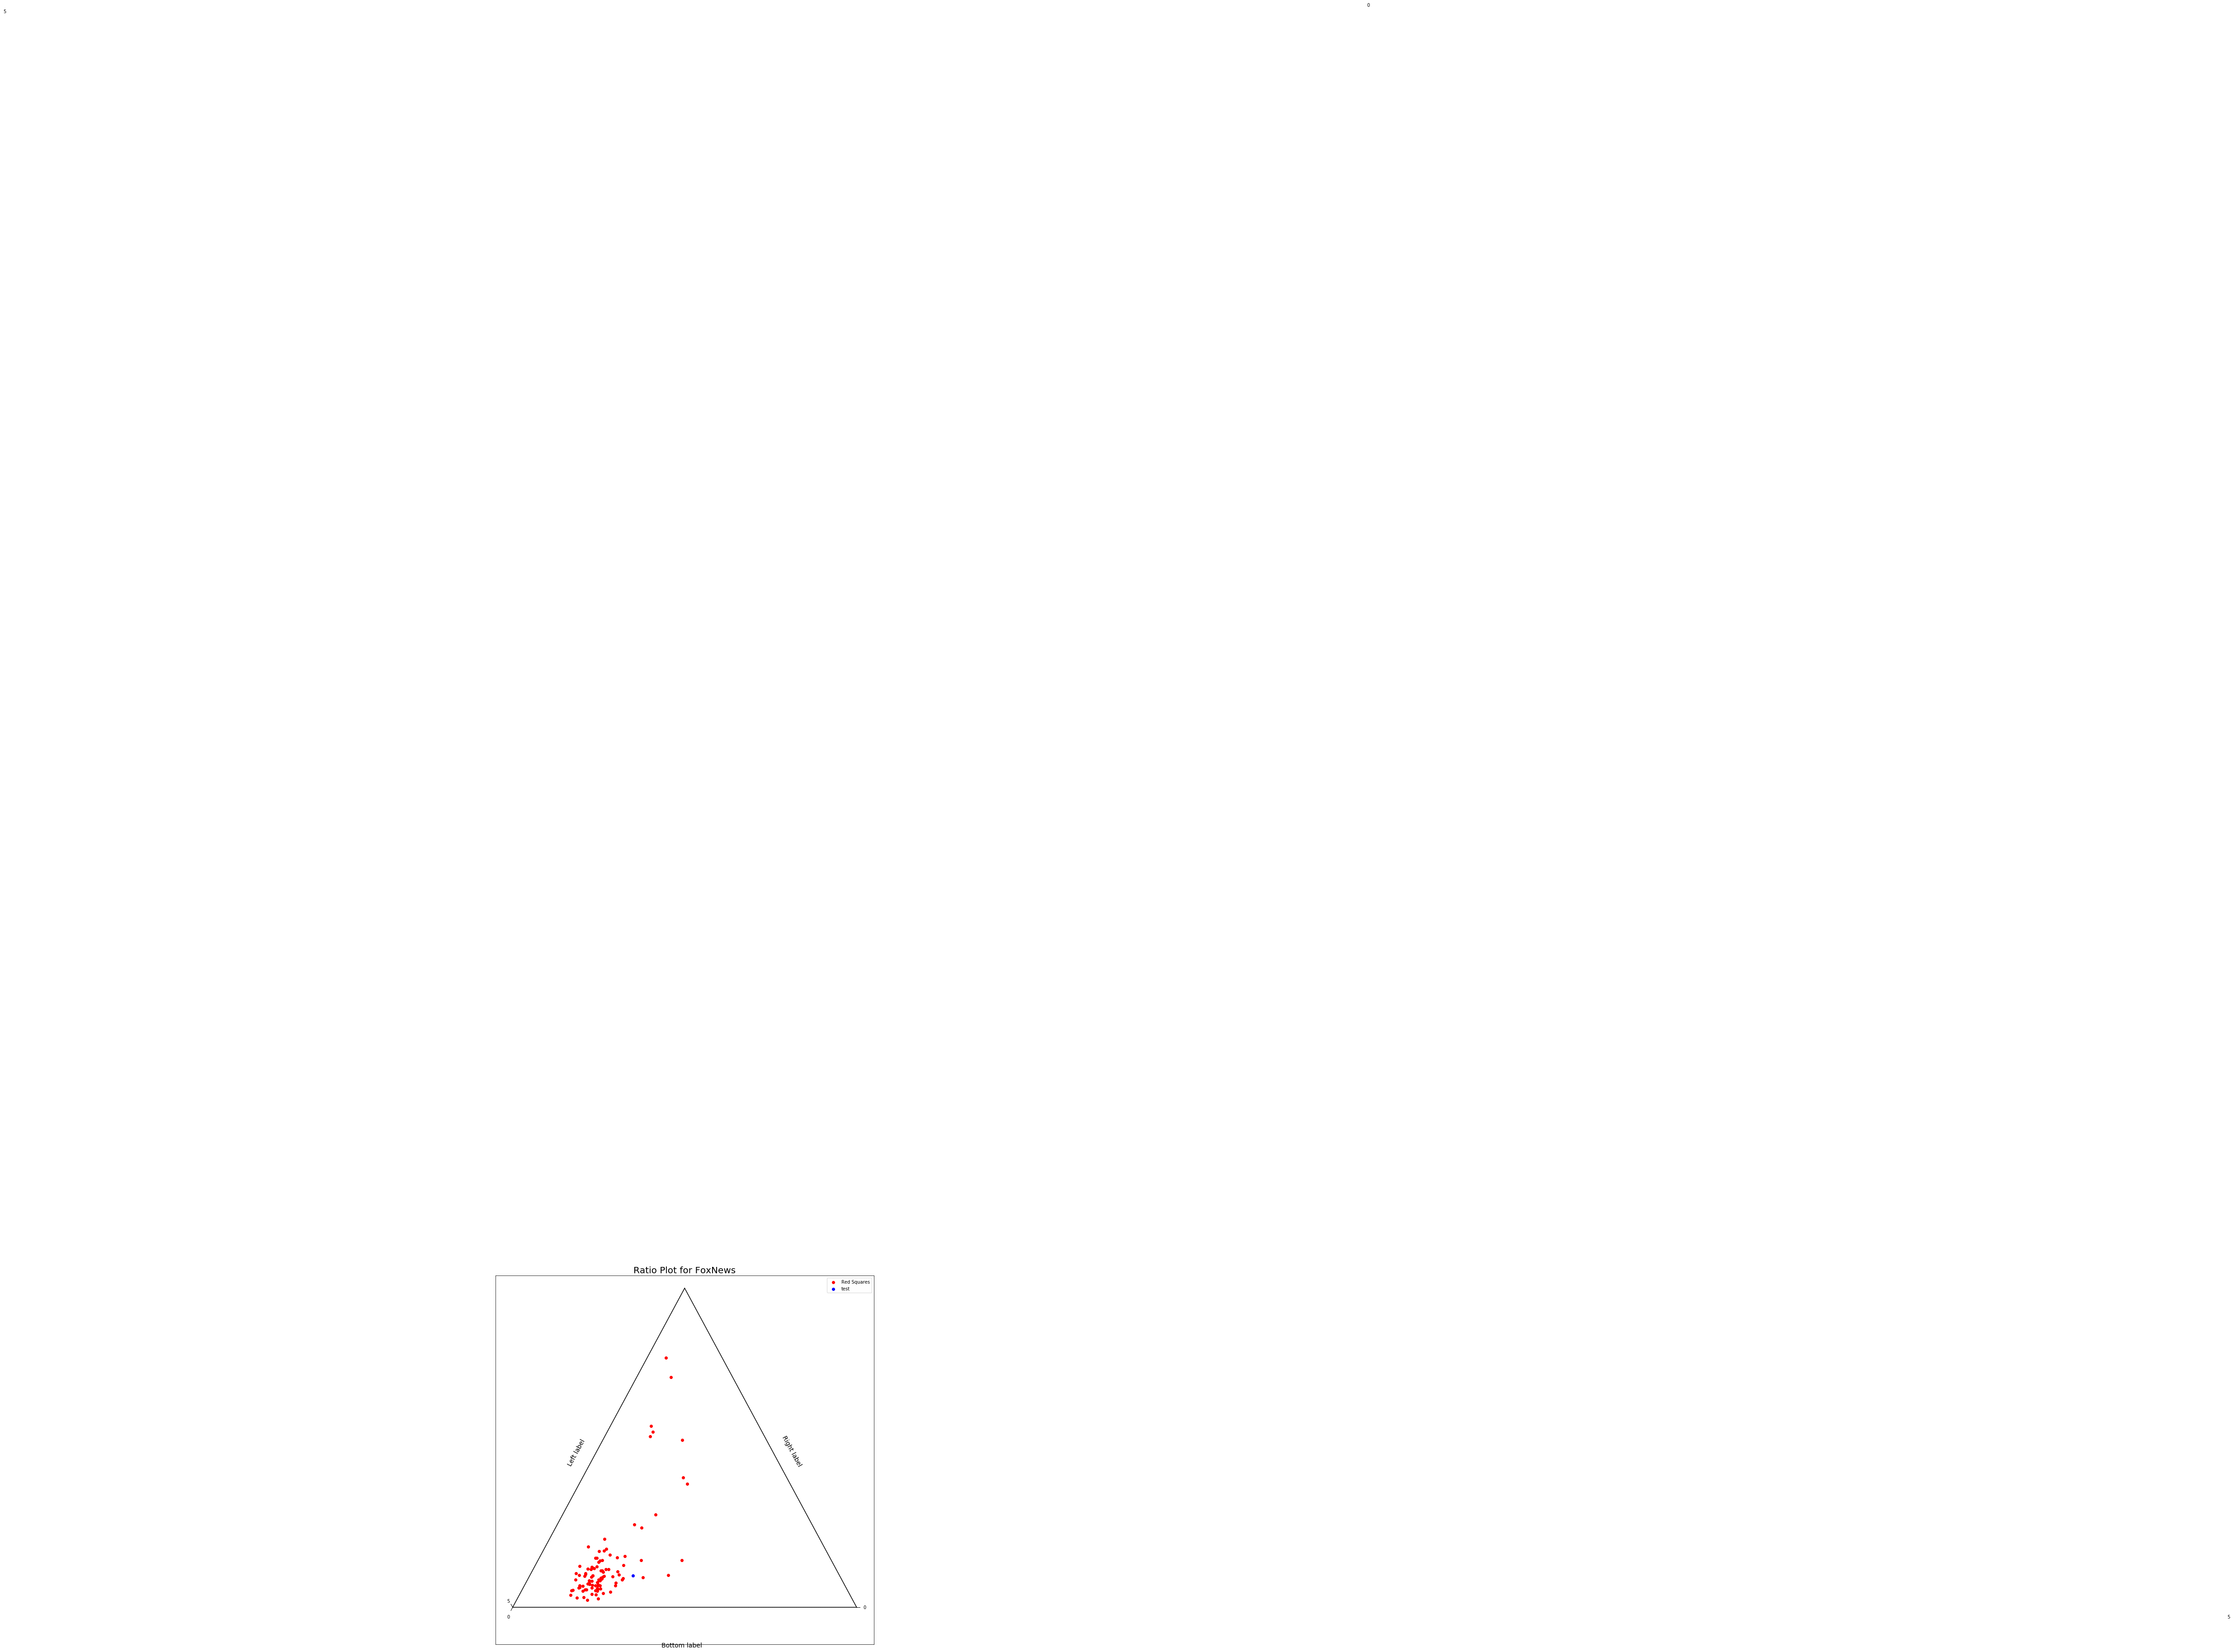

In [349]:
scale = 1

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(15, 15)
# Set Axis labels and Title
tax.boundary(linewidth=1.5)
tax.gridlines(multiple=5, color="k")
tax.set_title("Ratio Plot for {}".format(screenname), fontsize=20)
tax.left_axis_label("Left label ", fontsize=14)
tax.right_axis_label("Right label ", fontsize=14)
tax.bottom_axis_label("Bottom label ", fontsize=14)

# Plot a few different styles with a legend
points = [i[0] for i in happ_tups]
tax.scatter(points, marker='o', color='red', label="Red Squares")
tax.scatter([(.3,.1,.6)],color='blue',label='test')
tax.legend()
tax.ticks(linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.savefig('taxplot.pdf')
tax.show()

In [23]:
import pickle

In [31]:
file = open('ratiodictTheTweetOfGod.pkl',"rb")
ratiosGod = pickle.load(file)
ratiosGod = pd.DataFrame(ratiosGod).transpose()
ratiosGod
#ratiosGod.to_csv('ratios/{}-ratios.csv'.format('TheTweetOfGod'))



happ_score happ_words  likes replies retweets  \
974665705328005121     5.9214        365  11788     150     2730   
974713843166269441    6.08265        961  48473     621    10810   
974816867553439744    5.71957        951  38801     507     9619   
975360001148530688    6.02327        704  29989     647     4745   
975499246362226693    5.87378        715  28669    1.2K     4459   
975520659311812610    6.11292        706  13785     248     7876   
976069293493256192    5.70886        685  25188     671    11057   
976146312562327553    6.08077        443  10113     175     2478   
976559593261211648    6.11331        668  50321     493    12906   
976926745927475200    6.10006        644  26079     499     4374   
977019507645415425    5.69135        743   7261     567     6359   
977614088413921280    5.85253        718  35794     595     8801   
977619203032211456    5.78904        250   2643      84      576   
977638666179772416    5.75802        863  89391    1.4K    32542   
977952794618441728     5.9065        786  20349     722     4898   
978453176754913280    6.16128         47  19627     459     3998   
978680460535521281    5.98651        461  17669     235     3725   

                            scrape_date total_words  tweet_date  \
974665705328005121  2018-04-29_17_17_29        1253  2018-03-16   
974713843166269441  2018-04-29_17_16_06        3372  2018-03-16   
974816867553439744  2018-04-29_17_14_40        3176  2018-03-16   
975360001148530688  2018-04-29_17_13_14        2348  2018-03-18   
975499246362226693  2018-04-29_17_11_51        2868  2018-03-18   
975520659311812610  2018-04-29_17_10_27        2672  2014-03-29   
976069293493256192  2018-04-29_17_09_01        2232  2018-03-20   
976146312562327553  2018-04-29_17_07_37        1526  2018-03-20   
976559593261211648  2018-04-29_17_06_15        2288  2018-03-21   
976926745927475200  2018-04-29_17_04_52        2036  2018-03-22   
977019507645415425  2018-04-29_17_03_28        2805  2018-03-22   
977614088413921280  2018-04-29_17_02_03        2301  2018-03-24   
977619203032211456  2018-04-29_17_00_42         841  2018-03-24   
977638666179772416  2018-04-29_16_59_14        3121  2017-11-06   
977952794618441728  2018-04-29_16_57_45        2940  2018-03-25   
978453176754913280  2018-04-29_16_56_22         156  2018-03-26   
978680460535521281  2018-04-29_16_54_58        1569  2018-03-27   

                              tweet_id  \
974665705328005121  974665705328005121   
974713843166269441  974713843166269441   
974816867553439744  974816867553439744   
975360001148530688  975360001148530688   
975499246362226693  975499246362226693   
975520659311812610  975520659311812610   
976069293493256192  976069293493256192   
976146312562327553  976146312562327553   
976559593261211648  976559593261211648   
976926745927475200  976926745927475200   
977019507645415425  977019507645415425   
977614088413921280  977614088413921280   
977619203032211456  977619203032211456   
977638666179772416  977638666179772416   
977952794618441728  977952794618441728   
978453176754913280  978453176754913280   
978680460535521281  978680460535521281   

                                                                  url  
974665705328005121  http://twitter.com/TheTweetOfGod/status/974665...  
974713843166269441  http://twitter.com/TheTweetOfGod/status/974713...  
974816867553439744  http://twitter.com/TheTweetOfGod/status/974816...  
975360001148530688  http://twitter.com/TheTweetOfGod/status/975360...  
975499246362226693  http://twitter.com/TheTweetOfGod/status/975499...  
975520659311812610  http://twitter.com/TheTweetOfGod/status/975520...  
976069293493256192  http://twitter.com/TheTweetOfGod/status/976069...  
976146312562327553  http://twitter.com/TheTweetOfGod/status/976146...  
976559593261211648  http://twitter.com/TheTweetOfGod/status/976559...  
976926745927475200  http://twitter.com/TheTweetOfGod/status/976926...  
977019507645415425  http://twitter.com

In [75]:
ls

failedjsons/                      jsons/
finishedjsons/                    kanye-ratio-wordcount.png
geckodriver*                      ratios/
geckodriver-v0.20.1-macos.tar.gz  ratios_w_happ/
geckodriver.log                   screenshots/
getreplies_selenium.py            test_getreplies_selenium.py
getreplies_selenium_whapp.py      tests/
happ_vectors/                     tweet_convos/
happreplies.py


In [38]:
jfile = open('finishedjsons/tweetskanye.json')
jsontweets = []
for line in jfile:
    jsontweets.append(line)
    
failedtweets = ['989554444990738432']

In [40]:
if len(failedtweets) > 0:
    #failedfile = open('failedjsons/{}'.format('finishedjsons/tweetskanye.json'),'a+')
    for tweetid in failedtweets:
        for line in jsontweets:
            if tweetid in line:
                print(line)

{"user":{"screen_name": "kanyewest"},"id": 989554444990738432}



In [26]:
convo = 'tweet_convos-noratio/realDonaldTrump/2018-04-17_14_34-realDonaldTrump-986540431436640256-id-6.4K_15808_66892-tweetconvo-2018-04-28_21_06_18.txt'

In [28]:
import re
re.search('(?<=-tweetconvo-).*(?=.txt)',convo[-115:]).group(0)
re.search('(?<=/).*',convo[-115:]).group(0)[:10]

'2018-04-17'

In [10]:
len(convo)

106